In [2]:
import cv2 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [3]:
model = VGG16(weights='imagenet')

2024-02-27 13:44:33.139658: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-27 13:44:33.265594: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-27 13:44:33.265774: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

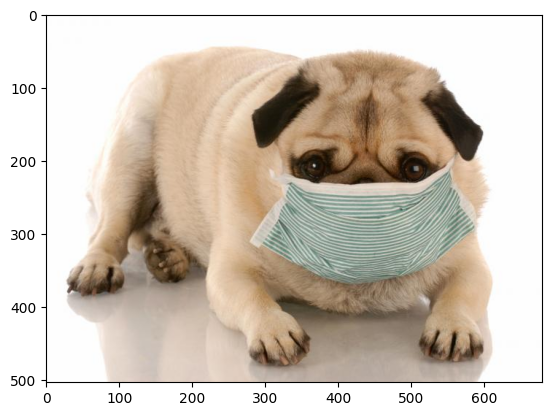

In [4]:
import matplotlib.pyplot as plt 

image = cv2.imread("/home/dev_ws/DL/data/dog.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [5]:
image = cv2.resize(image, dsize=(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

In [6]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

2024-02-27 13:50:47.641966: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 1s 835ms/step
pug (67.07%)


In [7]:
decode_predictions(yhat)

[[('n02110958', 'pug', 0.6707366),
  ('n03803284', 'muzzle', 0.29630163),
  ('n02099712', 'Labrador_retriever', 0.004672379),
  ('n04229816', 'ski_mask', 0.0030771615),
  ('n02112706', 'Brabancon_griffon', 0.0028137004)]]

In [8]:
!unzip -qq '/home/kkyu/Downloads/dogs-vs-cats.zip'

In [9]:
!unzip -qq '/home/kkyu/amr_ws/DL/src/test1.zip'

In [10]:
!unzip -qq '/home/kkyu/amr_ws/DL/src/train.zip'

In [11]:
import os 

path = "/home/kkyu/amr_ws/DL/src/train"
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

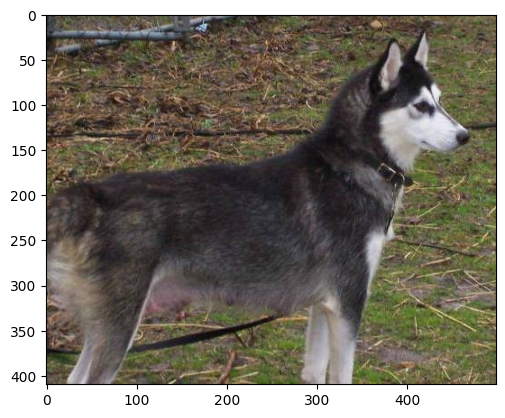

In [13]:
import random
import matplotlib.image as mpimg

image = mpimg.imread(path + '/' + full_names[0])
plt.imshow(image)
plt.show()

In [18]:
image = cv2.resize(image, dsize=(224, 224))  # Corrected 'dsize'
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s (%.2f%%)" % (label[1], label[2]*100))

1/1 [==============================] - 0s 14ms/step
Eskimo_dog (43.75%)


In [19]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image, dsize = (224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    return preprocess_input(image)


In [20]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1/1 [==============================] - 0s 21ms/step


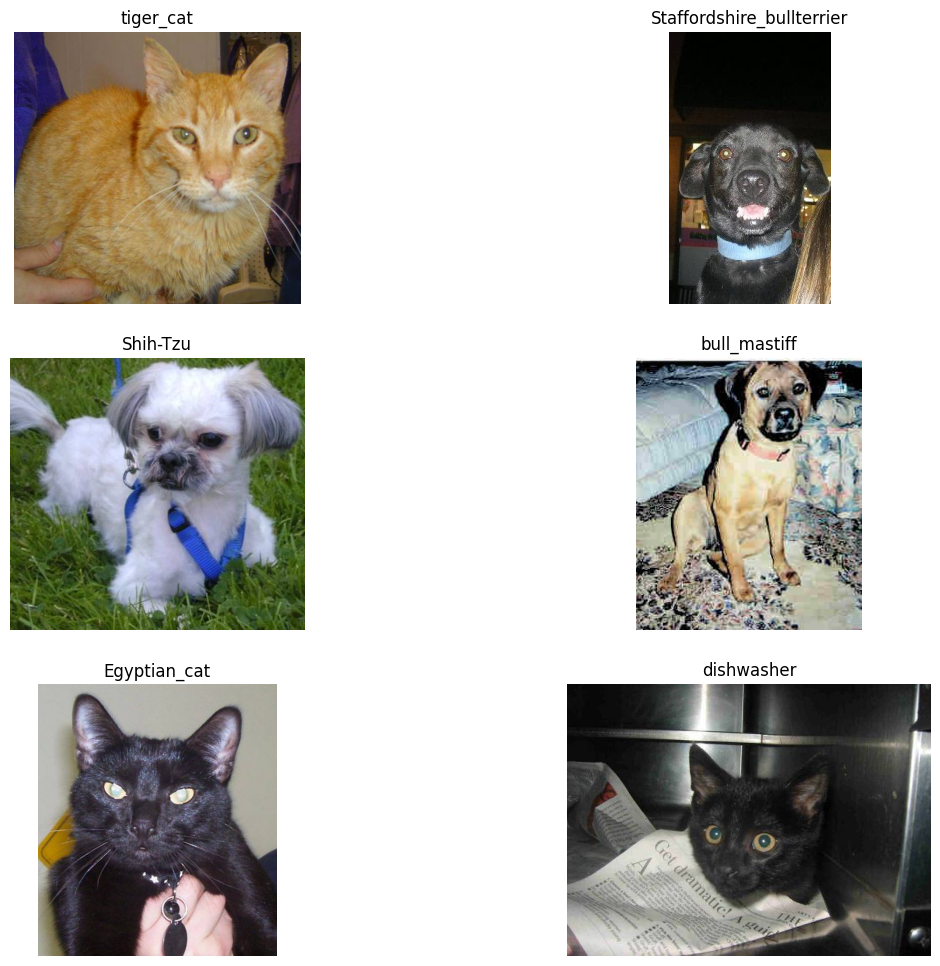

In [22]:
plt.figure(figsize = (14, 12))
idx = 1

for each in random.choices(full_names, k = 6):
    image = mpimg.imread(path + '/' + each)
    plt.subplot(3, 2, idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')

plt.show()